## Importing Necessary Packages

In [160]:
import sys, os
import pandas as pd
import cv2
import numpy as np
import seaborn as sns
import glob
import PIL
from tensorflow.keras.models import Sequential,model_from_json
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization,AveragePooling2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import History
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


##Preprocessing the Data and Reading the data


In [3]:
num_features = 64
num_labels = 7
batch_size = 128
epochs = 150
width, height = 48, 48
df=pd.read_csv('C:/Users/Kunj/Downloads/fer2013/fer2013.csv')
#df=pd.read_csv('C:\\Users\\Kunj\\Downloads\\ck+')

# print(df.info())
# print(df["Usage"].value_counts())

# print(df.head())
X_train,train_y,X_test,test_y,X_Ptest,Ptest_y=[],[],[],[],[],[]
 
for index, row in df.iterrows():
    val=row['pixels'].split(" ")
    try:
        if 'Training' in row['Usage']:
           X_train.append(np.array(val,'float32'))
           train_y.append(row['emotion'])
        elif 'PublicTest' in row['Usage']:
           X_test.append(np.array(val,'float32'))
           test_y.append(row['emotion'])
        elif 'PrivateTest' in row['Usage']:
            X_Ptest.append(np.array(val,'float32'))
            Ptest_y.append(row['emotion'])
    except:
        print(f"error occured at index :{index} and row:{row}")

In [4]:
num_angry_tr, num_disgust_tr, num_fear_tr, num_happy_tr, num_sad_tr, num_surprise_tr, num_neutral_tr=0,0,0,0,0,0,0
num_angry_te, num_disgust_te, num_fear_te, num_happy_te, num_sad_te, num_surprise_te, num_neutral_te=0,0,0,0,0,0,0
num_angry_pte, num_disgust_pte, num_fear_pte, num_happy_pte, num_sad_pte, num_surprise_pte, num_neutral_pte=0,0,0,0,0,0,0

for index, row in df.iterrows():  
  if 'Training' in row['Usage']: 
    if row['emotion']==0:
      num_angry_tr+=1
    if row['emotion']==1:
      num_disgust_tr+=1  
    if row['emotion']==2:
      num_fear_tr+=1 
    if row['emotion']==3:
      num_happy_tr+=1
    if row['emotion']==4:
      num_sad_tr+=1 
    if row['emotion']==5:
      num_surprise_tr+=1 
    if row['emotion']==6:
      num_neutral_tr+=1
  elif 'PublicTest' in row['Usage']:
    if row['emotion']==0:
      num_angry_te+=1
    if row['emotion']==1:
      num_disgust_te+=1  
    if row['emotion']==2:
      num_fear_te+=1 
    if row['emotion']==3:
      num_happy_te+=1
    if row['emotion']==4:
      num_sad_te+=1 
    if row['emotion']==5:
      num_surprise_te+=1 
    if row['emotion']==6:
      num_neutral_te+=1
  elif 'PrivateTest' in row['Usage']:
    if row['emotion']==0:
      num_angry_pte+=1
    if row['emotion']==1:
      num_disgust_pte+=1  
    if row['emotion']==2:
      num_fear_pte+=1 
    if row['emotion']==3:
      num_happy_pte+=1
    if row['emotion']==4:
      num_sad_pte+=1 
    if row['emotion']==5:
      num_surprise_pte+=1 
    if row['emotion']==6:
      num_neutral_pte+=1


Number of Training Samples for Angry Expression =  3995
Number of Training Samples for Disgust Expression =  436
Number of Training Samples for Happy Expression =  7215
Number of Training Samples for Fear Expression =  4097
Number of Training Samples for Sad Expression =  4830
Number of Training Samples for Surprise Expression =  3171
Number of Training Samples for Neutral Expression =  4965


<BarContainer object of 7 artists>

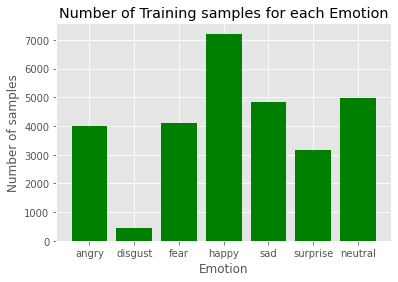

In [23]:
print("Number of Training Samples for Angry Expression = ",num_angry_tr)
print("Number of Training Samples for Disgust Expression = ",num_disgust_tr)
print("Number of Training Samples for Happy Expression = ",num_happy_tr)
print("Number of Training Samples for Fear Expression = ",num_fear_tr)
print("Number of Training Samples for Sad Expression = ",num_sad_tr)
print("Number of Training Samples for Surprise Expression = ",num_surprise_tr)
print("Number of Training Samples for Neutral Expression = ",num_neutral_tr)

Y=[num_angry_tr, num_disgust_tr, num_fear_tr, num_happy_tr, num_sad_tr, num_surprise_tr, num_neutral_tr]
X=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
%matplotlib inline
plt.style.use('ggplot')
plt.xlabel('Emotion')
plt.ylabel('Number of samples')
plt.title('Number of Training samples for each Emotion')
plt.bar(X,Y,color='green')


Number of Validation Samples for Angry Expression =  467
Number of Validation Samples for Disgust Expression =  56
Number of Validation Samples for Happy Expression =  895
Number of Validation Samples for Fear Expression =  496
Number of Validation Samples for Sad Expression =  653
Number of Validation Samples for Surprise Expression =  415
Number of Validation Samples for Neutral Expression =  607


<BarContainer object of 7 artists>

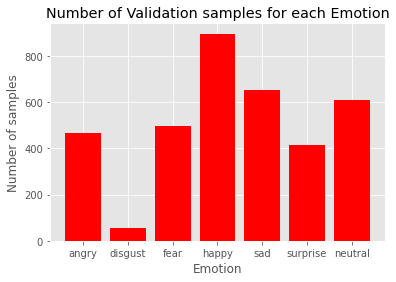

In [22]:
print("Number of Validation Samples for Angry Expression = ",num_angry_te)
print("Number of Validation Samples for Disgust Expression = ",num_disgust_te)
print("Number of Validation Samples for Happy Expression = ",num_happy_te)
print("Number of Validation Samples for Fear Expression = ",num_fear_te)
print("Number of Validation Samples for Sad Expression = ",num_sad_te)
print("Number of Validation Samples for Surprise Expression = ",num_surprise_te)
print("Number of Validation Samples for Neutral Expression = ",num_neutral_te)

Y_val=[num_angry_te, num_disgust_te, num_fear_te, num_happy_te, num_sad_te, num_surprise_te, num_neutral_te]
X_val=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
%matplotlib inline
plt.style.use('ggplot')
plt.xlabel('Emotion')
plt.ylabel('Number of samples')
plt.title('Number of Validation samples for each Emotion')
plt.bar(X_val,Y_val,color='red')

Number of Private Test Samples for Angry Expression =  491
55
879
528
594
416
626


<BarContainer object of 7 artists>

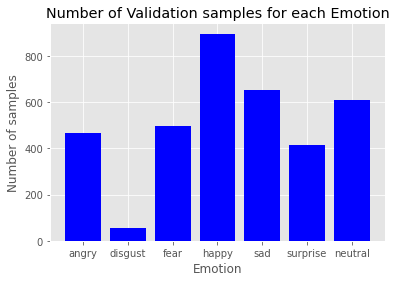

In [19]:
print("Number of Private Test Samples for Angry Expression = ",num_angry_pte)
print("Number of Private Test Samples for Disgust Expression = ",num_disgust_pte)
print("Number of Private Test Samples for Happy Expression = ",num_happy_pte)
print("Number of Private Test Samples for Fear Expression = ",num_fear_pte)
print("Number of Private Test Samples for Sad Expression = ",num_sad_pte)
print("Number of Private Test Samples for Surprise Expression = ",num_surprise_pte)
print("Number of Private Test Samples for Neutral Expression = ",num_neutral_pte)

Y_PTest=[num_angry_te, num_disgust_te, num_fear_te, num_happy_te, num_sad_te, num_surprise_te, num_neutral_te]
X_PTest=['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']
%matplotlib inline
plt.style.use('ggplot')
plt.xlabel('Emotion')
plt.ylabel('Number of samples')
plt.title('Number of Validation samples for each Emotion')
plt.bar(X_PTest,Y_PTest,color='blue')

In [10]:
X_train = np.array(X_train,'float32')
train_y = np.array(train_y,'float32')
X_test = np.array(X_test,'float32')
test_y = np.array(test_y,'float32')

train_y=to_categorical(train_y, num_classes=num_labels)
test_y=to_categorical(test_y, num_classes=num_labels)

#cannot produce
#normalizing data between oand 1
X_train -= np.mean(X_train, axis=0)
X_train /= np.std(X_train, axis=0)

X_test -= np.mean(X_test, axis=0)
X_test /= np.std(X_test, axis=0)

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)

X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

In [11]:
# print(f"shape:{X_train.shape}")
##designing the cnn
model = Sequential()


#1st convolution layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(X_train.shape[1:])))
model.add(Conv2D(64,kernel_size= (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(num_labels, activation='softmax'))
model.summary()

#Compliling the model
model.compile(loss=categorical_crossentropy,
              optimizer=SGD(learning_rate=0.075),
              metrics=['accuracy'])



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 9, 9, 128)        

In [9]:
#Training the model
seqModel=model.fit(X_train, train_y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, test_y),
          shuffle=True)



Train on 28709 samples, validate on 3589 samples
Epoch 1/150
28709/28709 [==============================] - 12s 424us/sample - loss: 1.8044 - accuracy: 0.2508 - val_loss: 1.7843 - val_accuracy: 0.2524
Epoch 2/150
28709/28709 [==============================] - 9s 307us/sample - loss: 1.7693 - accuracy: 0.2659 - val_loss: 1.7646 - val_accuracy: 0.2906
Epoch 3/150
28709/28709 [==============================] - 9s 309us/sample - loss: 1.7021 - accuracy: 0.3150 - val_loss: 1.6504 - val_accuracy: 0.3583
Epoch 4/150
28709/28709 [==============================] - 9s 310us/sample - loss: 1.6522 - accuracy: 0.3440 - val_loss: 1.6130 - val_accuracy: 0.3583
Epoch 5/150
28709/28709 [==============================] - 9s 312us/sample - loss: 1.6069 - accuracy: 0.3689 - val_loss: 1.6095 - val_accuracy: 0.3670
Epoch 6/150
28709/28709 [==============================] - 9s 312us/sample - loss: 1.5698 - accuracy: 0.3848 - val_loss: 1.6945 - val_accuracy: 0.3455
Epoch 7/150
28709/28709 [===================

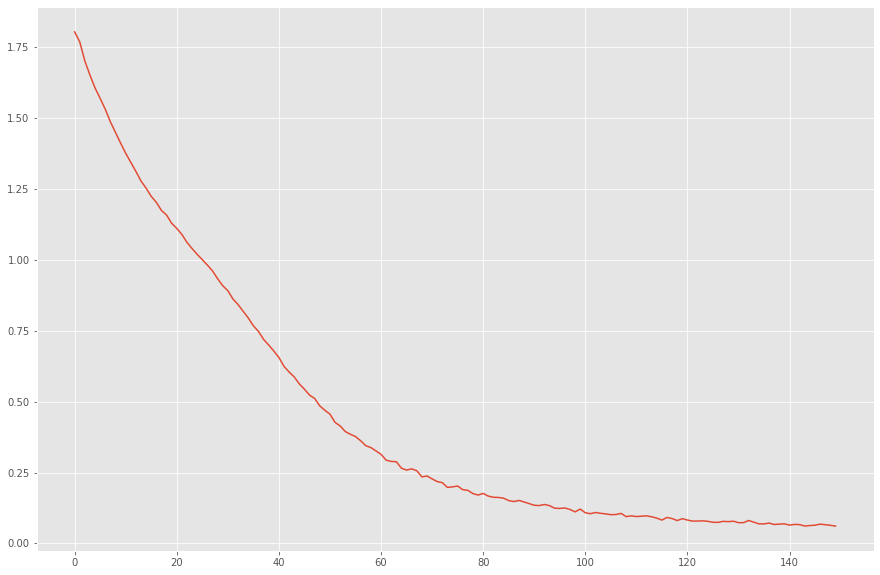

In [34]:

train_loss= seqModel.history['loss']
train_acc= seqModel.history['accuracy']
val_loss= seqModel.history['val_loss']
val_acc= seqModel.history['val_accuracy']
xc = range(epochs)

plt.figure(figsize=(15,10))
plt.plot(xc, train_loss)


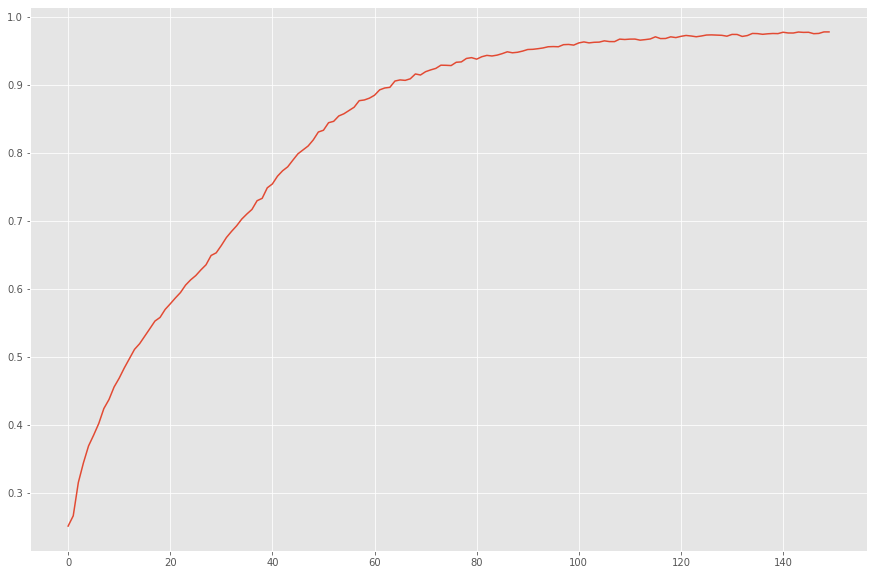

In [32]:
plt.figure(figsize=(15,10))
plt.plot(xc, train_acc)

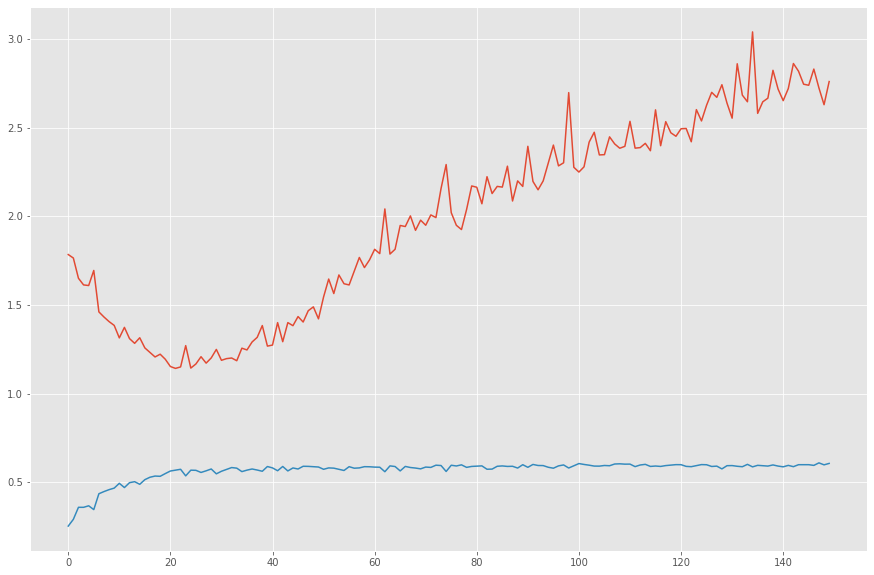

In [35]:
plt.figure(figsize=(15,10))
plt.plot(xc,val_loss)
plt.plot(xc,val_acc)

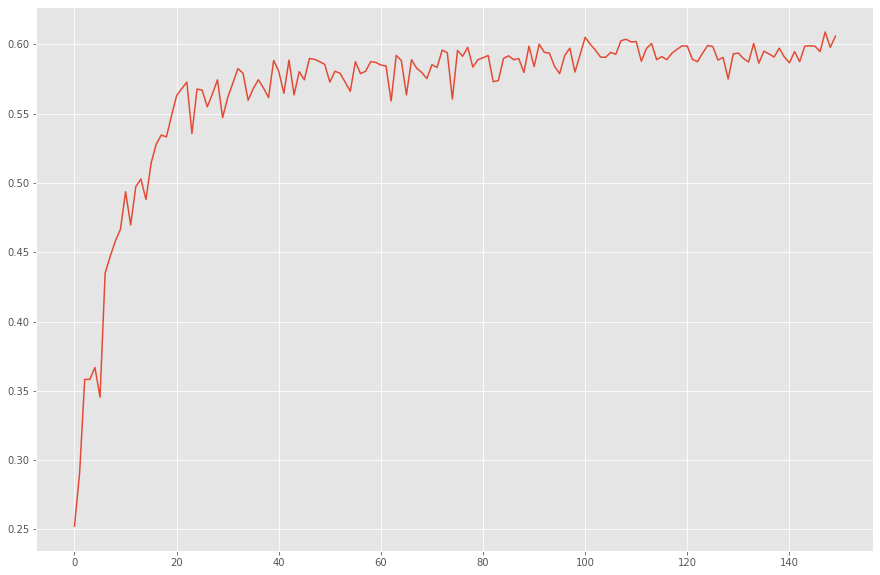

In [27]:
plt.figure(figsize=(15,10))
plt.plot(xc,val_acc)

In [36]:
#Saving the  model to  use it later on
fer_json = model.to_json()
with open("C:/Users/Kunj/Downloads/fer2013/fer3.json", "w") as json_file:
    json_file.write(fer_json)
model.save_weights("C:/Users/Kunj/Downloads/fer2013/fer3.h5")

In [2]:
#load model
model = model_from_json(open("C:\\Users\\Kunj\\Downloads\\Facial_Expression_Recognition\\fer3.json", "r").read())
#load weights
model.load_weights("C:\\Users\\Kunj\\Downloads\\Facial_Expression_Recognition\\fer3.h5")

In [53]:
human_angry=glob.glob("C:\\Users\\Kunj\\Downloads\\Facial_Expression_Recognition\\DATA\\anger\\*.png")
print("Number of images in Angry emotion = "+str(len(human_angry)))


Number of images in Angry emotion = 135


In [264]:
human_angry_folderName = [str("/".join(i.split("\\")[:7]))+"/" for i in human_angry]
human_angry_imageName = [str(i.split("\\")[7]) for i in human_angry]
human_angry_emotion = [["Angry"]*len(human_angry)][0]
human_angry_label = [1]*len(human_angry)

len(human_angry_folderName), len(human_angry_imageName), len(human_angry_emotion), len(human_angry_label)

(135, 135, 135, 135)

In [265]:
df_angry = pd.DataFrame()
df_angry["folderName"] = human_angry_folderName
df_angry["imageName"] = human_angry_imageName
df_angry["Emotion"] = human_angry_emotion
df_angry["Labels"] = human_angry_label
df_angry.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S010_004_00000017.png,Angry,1
1,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S010_004_00000018.png,Angry,1
2,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S010_004_00000019.png,Angry,1
3,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_004_00000019.png,Angry,1
4,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_004_00000020.png,Angry,1


In [266]:
human_disgust=glob.glob("C:\\Users\\Kunj\\Downloads\\Facial_Expression_Recognition\\DATA\\disgust\\*.png")
print("Number of images in Disgust emotion = "+str(len(human_disgust)))

Number of images in Disgust emotion = 177


In [267]:
human_disgust_folderName = [str("/".join(i.split("\\")[:7]))+"/" for i in human_disgust]
human_disgust_imageName = [str(i.split("\\")[7]) for i in human_disgust]
human_disgust_emotion = [["Disgust"]*len(human_disgust)][0]
human_disgust_label = [2]*len(human_disgust)

len(human_disgust_folderName), len(human_disgust_imageName), len(human_disgust_emotion), len(human_disgust_label)

(177, 177, 177, 177)

In [268]:
df_disgust = pd.DataFrame()
df_disgust["folderName"] = human_disgust_folderName
df_disgust["imageName"] = human_disgust_imageName
df_disgust["Emotion"] = human_disgust_emotion
df_disgust["Labels"] = human_disgust_label
df_disgust.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S005_001_00000009.png,Disgust,2
1,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S005_001_00000010.png,Disgust,2
2,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S005_001_00000011.png,Disgust,2
3,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_005_00000018.png,Disgust,2
4,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_005_00000019.png,Disgust,2


In [269]:
human_fear=glob.glob("C:\\Users\\Kunj\\Downloads\\Facial_Expression_Recognition\\DATA\\fear\\*.png")
print("Number of images in Fear emotion = "+str(len(human_fear)))

Number of images in Fear emotion = 75


In [270]:
human_fear_folderName = [str("/".join(i.split("\\")[:7]))+"/" for i in human_fear]
human_fear_imageName = [str(i.split("\\")[7]) for i in human_fear]
human_fear_emotion = [["Fear"]*len(human_fear)][0]
human_fear_label = [3]*len(human_fear)

len(human_fear_folderName), len(human_fear_imageName), len(human_fear_emotion), len(human_fear_label)

(75, 75, 75, 75)

In [271]:
df_fear = pd.DataFrame()
df_fear["folderName"] = human_fear_folderName
df_fear["imageName"] = human_fear_imageName
df_fear["Emotion"] = human_fear_emotion
df_fear["Labels"] = human_fear_label
df_fear.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_003_00000012.png,Fear,3
1,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_003_00000013.png,Fear,3
2,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_003_00000014.png,Fear,3
3,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S032_004_00000012.png,Fear,3
4,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S032_004_00000013.png,Fear,3


In [272]:
human_happy=glob.glob("C:\\Users\\Kunj\\Downloads\\Facial_Expression_Recognition\\DATA\\happy\\*.png")
print("Number of images in Happy emotion = "+str(len(human_happy)))

Number of images in Happy emotion = 207


In [275]:
human_happy_folderName = [str("/".join(i.split("\\")[:7]))+"/" for i in human_happy]
human_happy_imageName = [str(i.split("\\")[7]) for i in human_happy]
human_happy_emotion = [["Happy"]*len(human_happy)][0]
human_happy_label = [4]*len(human_happy)

len(human_happy_folderName), len(human_happy_imageName), len(human_happy_emotion), len(human_happy_label)

(207, 207, 207, 207)

In [276]:
df_happy = pd.DataFrame()
df_happy["folderName"] = human_happy_folderName
df_happy["imageName"] = human_happy_imageName
df_happy["Emotion"] = human_happy_emotion
df_happy["Labels"] = human_happy_label
df_happy.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S010_006_00000013.png,Happy,4
1,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S010_006_00000014.png,Happy,4
2,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S010_006_00000015.png,Happy,4
3,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_006_00000011.png,Happy,4
4,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_006_00000012.png,Happy,4


In [277]:
human_sad=glob.glob("C:\\Users\\Kunj\\Downloads\\Facial_Expression_Recognition\\DATA\\sadness\\*.png")
print("Number of images in Sad emotion = "+str(len(human_sad)))

Number of images in Sad emotion = 84


In [278]:
human_sad_folderName = [str("/".join(i.split("\\")[:7]))+"/" for i in human_sad]
human_sad_imageName = [str(i.split("\\")[7]) for i in human_sad]
human_sad_emotion = [["Sad"]*len(human_sad)][0]
human_sad_label = [5]*len(human_sad)

len(human_sad_folderName), len(human_sad_imageName), len(human_sad_emotion), len(human_neutral_label)

(84, 84, 84, 54)

In [279]:
df_sad = pd.DataFrame()
df_sad["folderName"] = human_sad_folderName
df_sad["imageName"] = human_sad_imageName
df_sad["Emotion"] = human_sad_emotion
df_sad["Labels"] = human_sad_label
df_sad.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_002_00000020.png,Sad,5
1,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_002_00000021.png,Sad,5
2,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_002_00000022.png,Sad,5
3,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S014_002_00000014.png,Sad,5
4,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S014_002_00000015.png,Sad,5


In [280]:
human_surprise=glob.glob("C:\\Users\\Kunj\\Downloads\\Facial_Expression_Recognition\\DATA\\surprise\\*.png")
print("Number of images in Surprise emotion = "+str(len(human_surprise)))

Number of images in Surprise emotion = 249


In [281]:
human_surprise_folderName = [str("/".join(i.split("\\")[:7]))+"/" for i in human_surprise]
human_surprise_imageName = [str(i.split("\\")[7]) for i in human_surprise]
human_surprise_emotion = [["Surprise"]*len(human_surprise)][0]
human_surprise_label = [6]*len(human_surprise)

len(human_surprise_folderName), len(human_surprise_imageName), len(human_surprise_emotion), len(human_surprise_label)

(249, 249, 249, 249)

In [282]:
df_surprise = pd.DataFrame()
df_surprise["folderName"] = human_surprise_folderName
df_surprise["imageName"] = human_surprise_imageName
df_surprise["Emotion"] = human_surprise_emotion
df_surprise["Labels"] = human_surprise_label
df_surprise.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S010_002_00000012.png,Surprise,6
1,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S010_002_00000013.png,Surprise,6
2,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S010_002_00000014.png,Surprise,6
3,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_001_00000014.png,Surprise,6
4,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S011_001_00000015.png,Surprise,6


In [283]:
human_neutral=glob.glob("C:\\Users\\Kunj\\Downloads\\Facial_Expression_Recognition\\DATA\\neutral\\*.png")
print("Number of images in Neutral emotion = "+str(len(human_neutral)))

Number of images in Neutral emotion = 54


In [284]:
human_neutral_folderName = [str("/".join(i.split("\\")[:7]))+"/" for i in human_neutral]
human_neutral_imageName = [str(i.split("\\")[7]) for i in human_neutral]
human_neutral_emotion = [["Neutral"]*len(human_neutral)][0]
human_neutral_label = [7]*len(human_neutral)

len(human_neutral_folderName), len(human_neutral_imageName), len(human_neutral_emotion), len(human_neutral_label)

(54, 54, 54, 54)

In [287]:
df_neutral = pd.DataFrame()
df_neutral["folderName"] = human_neutral_folderName
df_neutral["imageName"] = human_neutral_imageName
df_neutral["Emotion"] = human_neutral_emotion
df_neutral["Labels"] = human_neutral_label
df_neutral.head()
print(df_neutral["folderName"][1])


C:/Users/Kunj/Downloads/Facial_Expression_Recognition/DATA/neutral/


### Concatening All DataFrames

In [288]:
frames = [df_angry, df_disgust, df_fear, df_happy, df_neutral, df_sad, df_surprise]
Final_Test_human = pd.concat(frames)
Final_Test_human.shape

(981, 4)

In [289]:
Final_Test_human.reset_index(inplace = True, drop = True)
Final_Test_human = Final_Test_human.sample(frac = 1.0)   #shuffling the dataframe
Final_Test_human.reset_index(inplace = True, drop = True)
Final_Test_human.head()

,folderName,imageName,Emotion,Labels
0,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S073_001_00000013.png,Surprise,6
1,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S032_005_00000014.png,Disgust,2
2,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S114_006_00000021.png,Happy,4
3,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S506_004_00000036.png,Fear,3
4,C:/Users/Kunj/Downloads/Facial_Expression_Reco...,S034_005_00000010.png,Happy,4


In [290]:
TestData_distribution = Final_Test_human["Emotion"].value_counts().sort_index()

TestData_distribution_sorted = sorted(TestData_distribution.items(), key = lambda d: d[1], reverse = True)



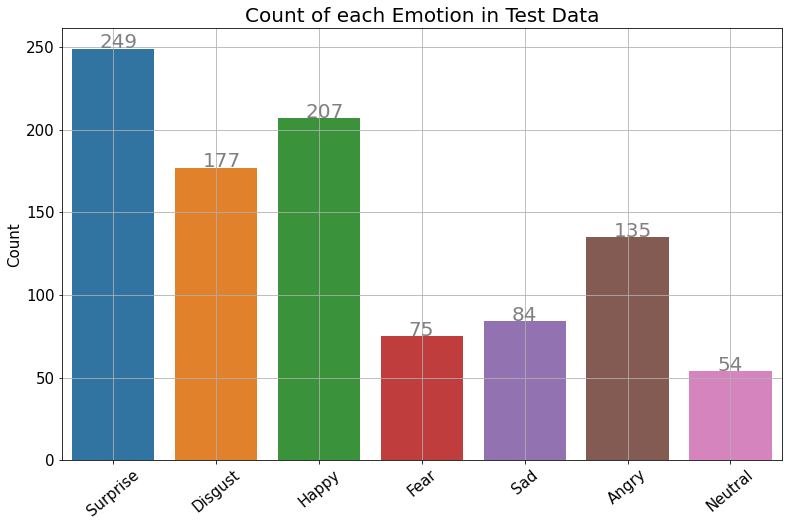

Number of training data points in class Surprise = 249(25.3823%)
Number of training data points in class Happy = 207(21.1009%)
Number of training data points in class Disgust = 177(18.0428%)
Number of training data points in class Angry = 135(13.7615%)
Number of training data points in class Sad = 84(8.5627%)
Number of training data points in class Fear = 75(7.6453%)
Number of training data points in class Neutral = 54(5.5046%)


In [291]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Emotion in Test Data", fontsize = 20)
sns.countplot(x = "Emotion", data = Final_Test_human)
plt.grid()
for i in ax.patches:
    ax.text(x = i.get_x() + 0.27, y = i.get_height()+0.2, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xticks(rotation = 40)
plt.show()

for i in TestData_distribution_sorted:
    print("Number of training data points in class "+str(i[0])+" = "+str(i[1])+ "("+str(np.round(((i[1]/Final_Test_human.shape[0])*100), 4))+"%)")

In [144]:
face_cascade = cv2.CascadeClassifier('C:\\Users\\Kunj\\Downloads\\Facial_Expression_Recognition\\haarcascade_frontalface_default.xml') 
#download this xml file from link: https://github.com/opencv/opencv/tree/master/data/haarcascades.
def face_det_crop_resize(img_path):
    img = cv2.imread(img_path)
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img, 1.3, 5)
    
    for (x,y,w,h) in faces:
        face_clip = img[y:y+h, x:x+w]  #cropping the face in image
        cv2.imwrite(img_path, cv2.resize(face_clip, (350, 350)))

In [150]:
for i, d in Final_Test_human.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    face_det_crop_resize(img_path)

print(img_path)

C:/Users/Kunj/Downloads/Facial_Expression_Recognition/DATA/S128_011_00000016.png


In [149]:
def print_confusionMatrix(Y_TestLabels, PredictedLabels):
    confusionMatx = confusion_matrix(Y_TestLabels, PredictedLabels)
    
    precision = confusionMatx/confusionMatx.sum(axis = 0)
    
    recall = (confusionMatx.T/confusionMatx.sum(axis = 1)).T
    
    sns.set(font_scale=1.5)
    
    # confusionMatx = [[1, 2],
    #                  [3, 4]]
    # confusionMatx.T = [[1, 3],
    #                   [2, 4]]
    # confusionMatx.sum(axis = 1)  axis=0 corresponds to columns and axis=1 corresponds to rows in two diamensional array
    # confusionMatx.sum(axix =1) = [[3, 7]]
    # (confusionMatx.T)/(confusionMatx.sum(axis=1)) = [[1/3, 3/7]
    #                                                  [2/3, 4/7]]

    # (confusionMatx.T)/(confusionMatx.sum(axis=1)).T = [[1/3, 2/3]
    #                                                    [3/7, 4/7]]
    # sum of row elements = 1
    
    labels = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "NEUTRAL", "SAD", "SURPRISE"]
    
    plt.figure(figsize=(16,7))
    sns.heatmap(confusionMatx, cmap = "Blues", annot = True, fmt = ".1f", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(precision, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Precision Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()
    
    print("-"*125)
    
    plt.figure(figsize=(16,7))
    sns.heatmap(recall, cmap = "Blues", annot = True, fmt = ".2f", xticklabels=labels, yticklabels=labels)
    plt.title("Recall Matrix", fontsize = 30)
    plt.xlabel('Predicted Class', fontsize = 20)
    plt.ylabel('Original Class', fontsize = 20)
    plt.tick_params(labelsize = 15)
    plt.xticks(rotation = 90)
    plt.show()

In [294]:
predicted_labels, true_labels=[],[]
for i, d in Final_Test_human.iterrows():
    img_path = os.path.join(d["folderName"], d["imageName"])
    img_label=d["Labels"]    
    #img_r = cv2.resize(img,(48,48))
    img=PIL.Image.open(img_path)
    img_pixels = image.img_to_array(img)
    img_pixels = np.expand_dims(img_pixels, axis = 0)
    img_pixels /= 255
    preds=model.predict(img_pixels)
    predicted_labels.append(preds[0].argmax())
    true_labels.append(img_label)

accuracy=accuracy_score(true_labels,predicted_labels)

In [295]:
print("Accuracy on Human Test Data = {}%".format(np.round(float(accuracy*100), 2)))

Accuracy on Human Test Data = 17.64%


C:\Users\Kunj\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\Kunj\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


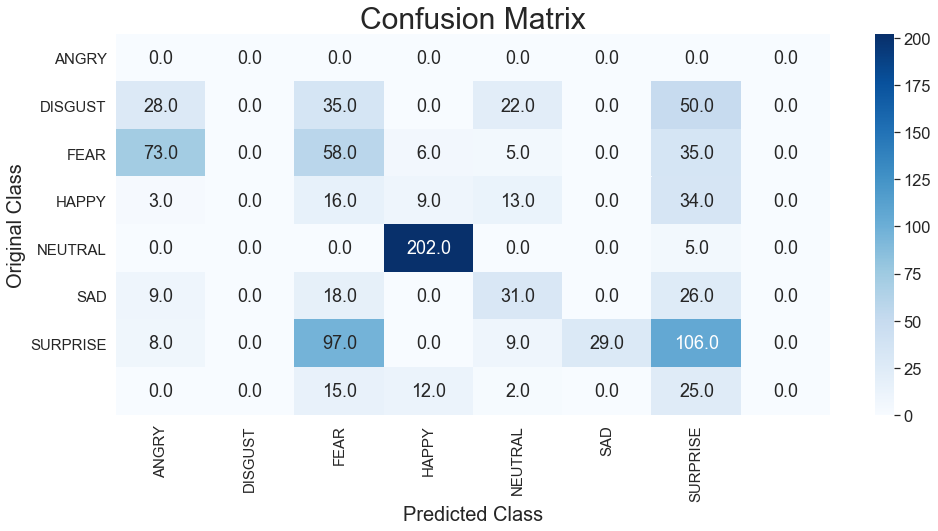

-----------------------------------------------------------------------------------------------------------------------------


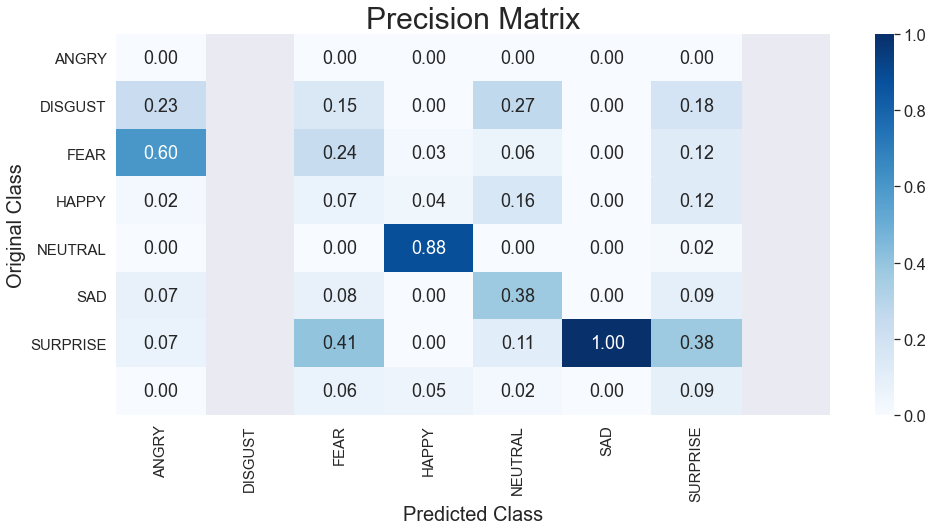

-----------------------------------------------------------------------------------------------------------------------------


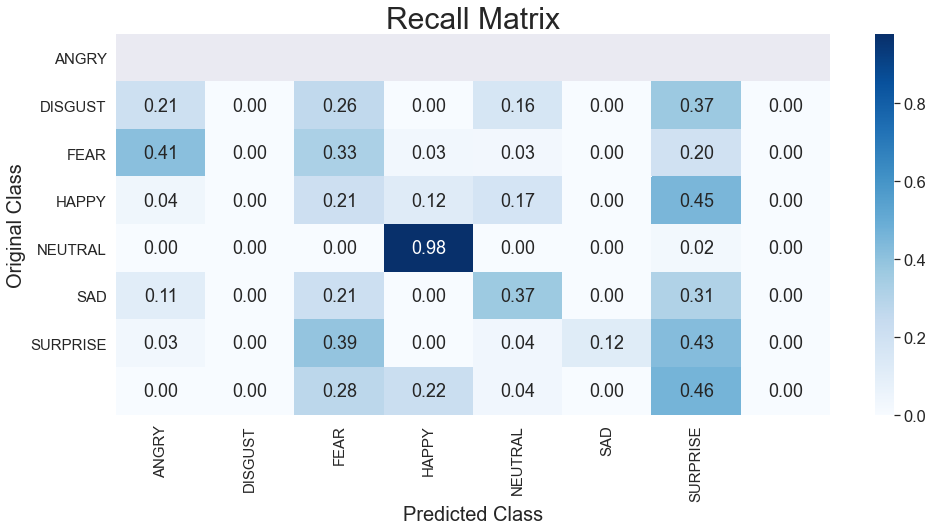

In [296]:
print_confusionMatrix(true_labels, predicted_labels)